In [7]:
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('Electric_Production.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the column names
print(df.columns)


Saving Electric_Production.csv to Electric_Production (2).csv
       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151
Index(['DATE', 'IPG2211A2N'], dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


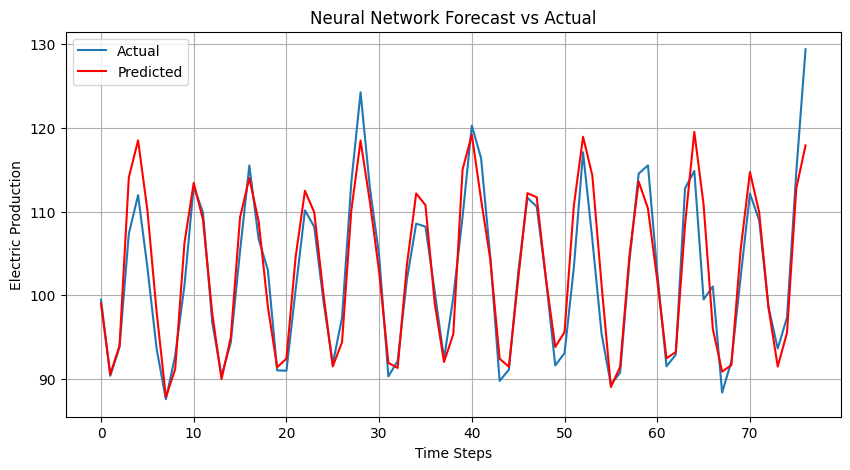

RMSE: 3.5773


In [12]:
# Install required packages (if not already available)
# !pip install pandas numpy matplotlib scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv('/content/Electric_Production.csv', parse_dates=['DATE'], index_col='DATE')

# Use the relevant column
data = df['IPG2211A2N'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Function to prepare time series data for supervised learning
def create_dataset(dataset, window_size):
    X, y = [], []
    for i in range(len(dataset) - window_size):
        X.append(dataset[i:i+window_size, 0])
        y.append(dataset[i+window_size, 0])
    return np.array(X), np.array(y)

# Define time window
window_size = 12
X, y = create_dataset(scaled_data, window_size)

# Split into training and testing sets (80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Predict on test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Neural Network Forecast vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()

# Show RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(actual, predictions))
print(f'RMSE: {rmse:.4f}')
